# **Patient Readmission Study Notebook**

## Objectives

* Answer business requirement 1:
 * The aim is to understand the general patterns of patient readmission.

## Inputs

* outputs/datasets/collection/patientReadmission.csv

## Outputs

* Derive insights and graphics to answer business requirement 1 and will be presented in the dashboard.



---

# Set working directory

In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspaces/patient-readmission-predictor'

---

# Load patient admission data

In [2]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/patientReadmission.csv")
df.head(4)

hospital_name Admission_date  hospital_id  \
0  The Johns Hopkins Hospital     30-01-2024         3946   
1  The Johns Hopkins Hospital     20-03-2022         7147   
2  The Johns Hopkins Hospital     13-07-2021         4174   
3  The Johns Hopkins Hospital     26-01-2021         2466   

   hospital_beds_available  occupied_beds hospital_ward  patient_id  \
0                      260             90     Maternity        1421   
1                      250             90           ICU        4922   
2                      350            220    Pediatrics        9804   
3                      190            350    Pediatrics        5622   

  patient_gender  patient_age patient_race  ...    time_slot  doctor_id  \
0         Female           48        Asian  ...  02:34:00 PM       1725   
1           Male           40        Black  ...  04:07:00 PM       7510   
2         Female           74        Black  ...  07:16:00 PM       7137   
3           Male           82     Hispanic  ...  07:27:00 AM       8801   

                        doctor_specialty patient_assigned_doctor  \
0                           Rheumatology                   False   
1  Pulmonology or Allergy and Immunology                   False   
2                              Neurology                   False   
3                             Cardiology                   False   

   patient_checkin_date patient_checkout_date  \
0            14-07-2024            19-07-2024   
1            19-07-2024            07/07/2024   
2            20-07-2024            29-06-2024   
3            25-06-2024            16-07-2024   

                      patient_disease patient_length_of_stay discharge_status  \
0                   Anxiety Disorders                      6         Deceased   
1       Urinary Tract Infection (UTI)                      2         Deceased   
2  Hypertension (High Blood Pressure)                     17        Recovered   
3                           Arthritis                     28        Recovered   

  readmission  
0           1  
1           1  
2           0  
3           0  

[4 rows x 23 columns]

In [3]:
# Disable warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Exploration

In [4]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Check columns and nan counts**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hospital_name            10000 non-null  object
 1   Admission_date           10000 non-null  object
 2   hospital_id              10000 non-null  int64 
 3   hospital_beds_available  10000 non-null  int64 
 4   occupied_beds            10000 non-null  int64 
 5   hospital_ward            10000 non-null  object
 6   patient_id               10000 non-null  int64 
 7   patient_gender           10000 non-null  object
 8   patient_age              10000 non-null  int64 
 9   patient_race             10000 non-null  object
 10  patient_sat_score        10000 non-null  int64 
 11  patient_waittime         10000 non-null  int64 
 12  department_referral      10000 non-null  object
 13  time_slot                10000 non-null  object
 14  doctor_id                10000 non-null

### Descriptive stats

Run `.describe()` on the df for numerical variables

In [ ]:
print("Duplicates: ", df.duplicated().sum())
df.describe().T

Duplicates:  0


count       mean          std     min      25%  \
hospital_id              10000.0  5515.9666  2605.495574  1000.0  3255.75   
hospital_beds_available  10000.0   299.1110   117.973859   100.0   200.00   
occupied_beds            10000.0   199.0850   118.299418     0.0   100.00   
patient_id               10000.0  5498.7387  2615.168591  1000.0  3232.50   
patient_age              10000.0    47.2830    27.719692     0.0    23.00   
patient_sat_score        10000.0   847.8020   432.952877   100.0   480.00   
patient_waittime         10000.0    67.8240    34.519765    15.0    30.00   
doctor_id                10000.0  5476.2290  2626.286129  1000.0  3178.75   
patient_length_of_stay   10000.0    15.5065     8.611955     1.0     8.00   
readmission              10000.0     0.4142     0.492608     0.0     0.00   

                            50%      75%     max  
hospital_id              5516.5  7790.25  9998.0  
hospital_beds_available   300.0   400.00   500.0  
occupied_beds             200.0   300.00   400.0  
patient_id               5478.5  7779.50  9999.0  
patient_age                47.0    71.00    95.0  
patient_sat_score         840.0  1220.00  1600.0  
patient_waittime           75.0   105.00   120.0  
doctor_id                5445.5  7783.00  9998.0  
patient_length_of_stay     16.0    23.00    30.0  
readmission                 0.0     1.00     1.0

Check Target variable unique value

In [7]:
df['readmission'].unique()

array([1, 0])

In [ ]:
# Check 'discharge_status'
print(df['discharge_status'].unique())
df = df[df['discharge_status'] != 'Deceased']
print(df['discharge_status'].unique())
df = df.reset_index(drop=True)
df.info()

['Deceased' 'Recovered' 'Transferred']
['Recovered' 'Transferred']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hospital_name            6681 non-null   object
 1   Admission_date           6681 non-null   object
 2   hospital_id              6681 non-null   int64 
 3   hospital_beds_available  6681 non-null   int64 
 4   occupied_beds            6681 non-null   int64 
 5   hospital_ward            6681 non-null   object
 6   patient_id               6681 non-null   int64 
 7   patient_gender           6681 non-null   object
 8   patient_age              6681 non-null   int64 
 9   patient_race             6681 non-null   object
 10  patient_sat_score        6681 non-null   int64 
 11  patient_waittime         6681 non-null   int64 
 12  department_referral      6681 non-null   object
 13  time_slot                6

### import plot packages

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

### Readmission frequencies

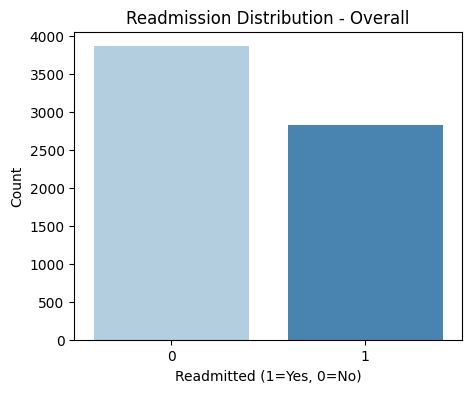

Readmission rate: 42.22%


In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='readmission', data=df, palette='Blues')
plt.title("Readmission Distribution - Overall")
plt.xlabel("Readmitted (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

# Readmission rate
readmit_rate = df['readmission'].mean()
print(f"Readmission rate: {readmit_rate:.2%}")

### Readmission by gender, age and race

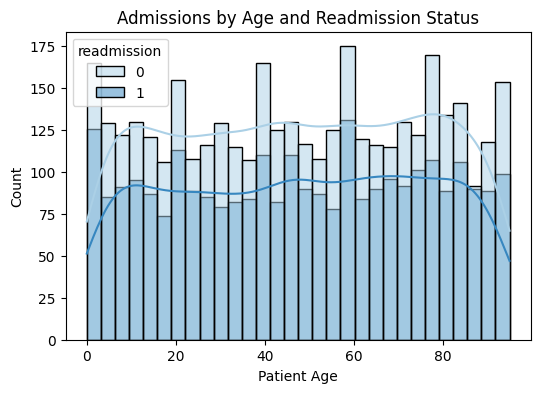

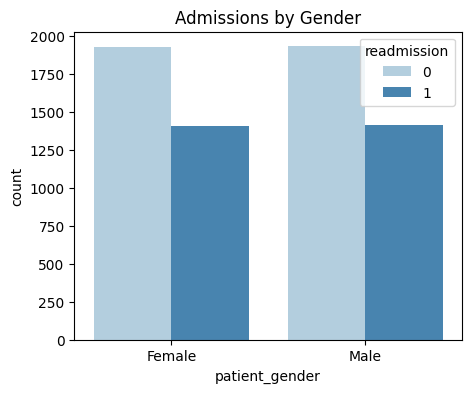

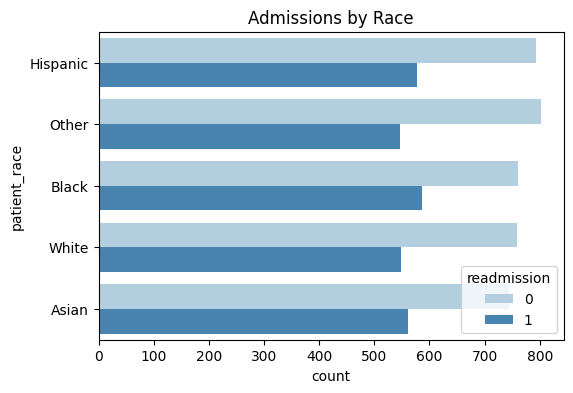

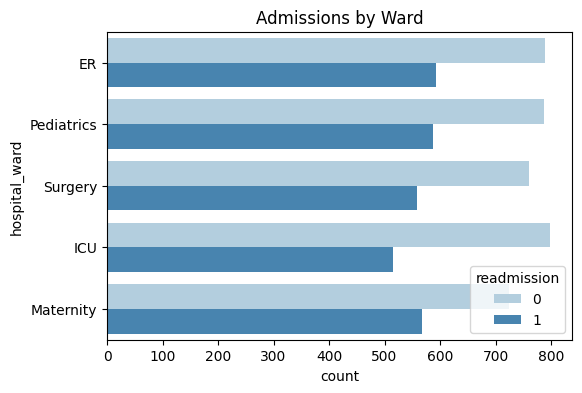

In [11]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='patient_age',hue='readmission',bins=30,kde=True,multiple='layer',palette='Blues'
)
plt.title("Admissions by Age and Readmission Status")
plt.xlabel("Patient Age")
plt.ylabel("Count")
plt.show()

# Gender breakdown
plt.figure(figsize=(5,4))
sns.countplot(x='patient_gender', data=df, hue='readmission', palette='Blues')
plt.title("Admissions by Gender")
plt.show()

# Race breakdown
plt.figure(figsize=(6,4))
sns.countplot(y='patient_race', data=df, hue='readmission', order=df['patient_race'].value_counts().index, palette='Blues')
plt.title("Admissions by Race")
plt.show()

# Ward breakdown
plt.figure(figsize=(6,4))
sns.countplot(y='hospital_ward', data=df, hue='readmission', order=df['hospital_ward'].value_counts().index, palette='Blues')
plt.title("Admissions by Ward")
plt.show()

### Admissions by disease, specialty

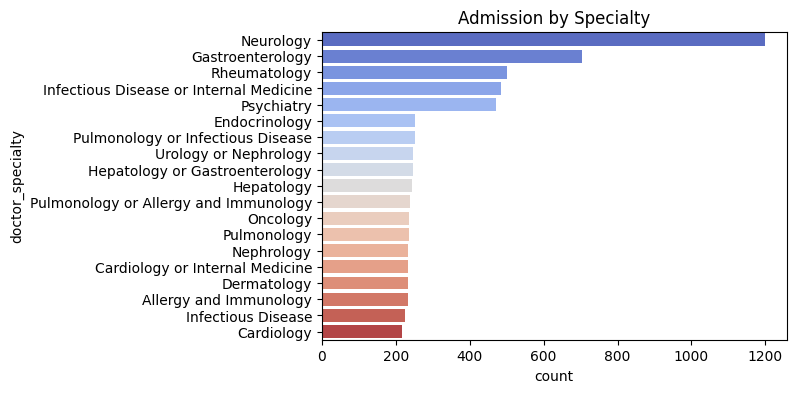

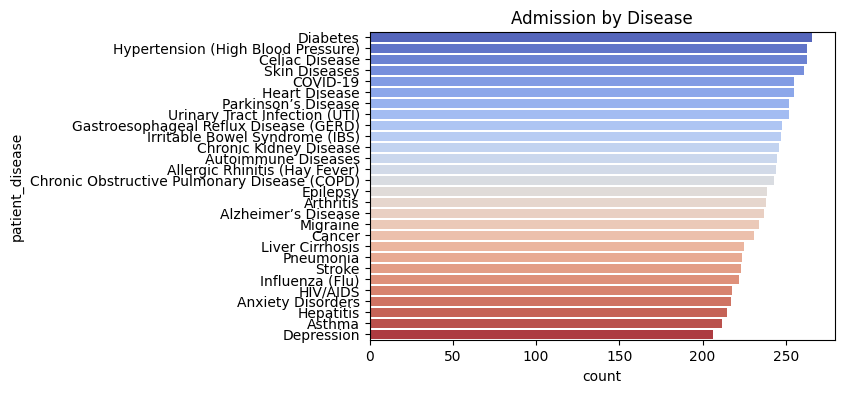

In [12]:
# By Specialty
plt.figure(figsize=(6,4))
sns.countplot(y='doctor_specialty', data=df, order=df['doctor_specialty'].value_counts().index, palette='coolwarm')
plt.title("Admission by Specialty")
plt.show()

# By Disease
plt.figure(figsize=(6,4))
sns.countplot(y='patient_disease', data=df, order=df['patient_disease'].value_counts().index, palette='coolwarm')
plt.title("Admission by Disease")
plt.show()


# Correlation Study

In [13]:
# remove dates variables
date_cols = ['Admission_date', 'patient_checkin_date', 'patient_checkout_date','time_slot']
# for col in date_cols:
#     df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True, infer_datetime_format=True)

df = df.drop(columns=date_cols)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hospital_name            6681 non-null   object
 1   hospital_id              6681 non-null   int64 
 2   hospital_beds_available  6681 non-null   int64 
 3   occupied_beds            6681 non-null   int64 
 4   hospital_ward            6681 non-null   object
 5   patient_id               6681 non-null   int64 
 6   patient_gender           6681 non-null   object
 7   patient_age              6681 non-null   int64 
 8   patient_race             6681 non-null   object
 9   patient_sat_score        6681 non-null   int64 
 10  patient_waittime         6681 non-null   int64 
 11  department_referral      6681 non-null   object
 12  doctor_id                6681 non-null   int64 
 13  doctor_specialty         6681 non-null   object
 14  patient_assigned_doctor  6681 non-null  

In [14]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(6681, 92)


hospital_id  hospital_beds_available  occupied_beds  patient_id  \
0         4174                      350            220        9804   
1         2466                      190            350        5622   
2         3014                      220            390        3314   

   patient_age  patient_sat_score  patient_waittime  doctor_id  \
0           74                920               120       7137   
1           82               1010                75       8801   
2           62                570                90       3588   

   patient_assigned_doctor  patient_length_of_stay  ...  \
0                    False                      17  ...   
1                    False                      28  ...   
2                    False                      16  ...   

   patient_disease_Alzheimer’s Disease  patient_disease_Autoimmune Diseases  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   

   patient_disease_Diabetes  patient_disease_Pneumonia  \
0                         0                          0   
1                         0                          0   
2                         0                          0   

   patient_disease_Celiac Disease  patient_disease_Asthma  \
0                               0                       0   
1                               0                       0   
2                               0                       0   

   patient_disease_Stroke  patient_disease_Depression  \
0                       0                           0   
1                       0                           0   
2                       0                           0   

   discharge_status_Recovered  discharge_status_Transferred  
0                           1                             0  
1                           1                             0  
2                           0                             1  

[3 rows x 92 columns]

In [15]:
corr_spearman = df_ohe.corr(method='spearman')['readmission'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

patient_disease_Cancer                                         -0.040700
patient_disease_Influenza (Flu)                                 0.032568
hospital_ward_ICU                                              -0.029601
patient_disease_Chronic Obstructive Pulmonary Disease (COPD)    0.026539
patient_disease_COVID-19                                       -0.026369
patient_disease_Epilepsy                                        0.026244
doctor_specialty_Pulmonology or Infectious Disease             -0.023878
doctor_specialty_Pulmonology or Allergy and Immunology          0.022083
doctor_specialty_Psychiatry                                     0.021977
department_referral_Hepatology                                  0.021536
Name: readmission, dtype: float64

In [16]:
corr_pearson = df_ohe.corr(method='pearson')['readmission'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

patient_disease_Cancer                                         -0.040700
patient_disease_Influenza (Flu)                                 0.032568
hospital_ward_ICU                                              -0.029601
patient_disease_Chronic Obstructive Pulmonary Disease (COPD)    0.026539
patient_disease_COVID-19                                       -0.026369
patient_disease_Epilepsy                                        0.026244
doctor_specialty_Pulmonology or Infectious Disease             -0.023878
doctor_specialty_Pulmonology or Allergy and Immunology          0.022083
doctor_specialty_Psychiatry                                     0.021977
department_referral_Hepatology                                  0.021536
Name: readmission, dtype: float64

**Top n correlations**

In [17]:
top_n = 8
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'doctor_specialty_Pulmonology or Allergy and Immunology',
 'doctor_specialty_Pulmonology or Infectious Disease',
 'hospital_ward_ICU',
 'patient_disease_COVID-19',
 'patient_disease_Cancer',
 'patient_disease_Chronic Obstructive Pulmonary Disease (COPD)',
 'patient_disease_Epilepsy',
 'patient_disease_Influenza (Flu)'}

In [18]:
# set vars_to_study
# vars_to_study = ['doctor_specialty','hospital_ward','patient_disease']
vars_to_study = ['hospital_ward', 'doctor_specialty','patient_disease',]
# vars_to_study = ['hospital_ward','patient_disease',]
vars_to_study

['hospital_ward', 'doctor_specialty', 'patient_disease']

## EDA on selected variables

In [19]:
df_eda = df.filter(vars_to_study + ['readmission'])
df_eda.head(3)

hospital_ward doctor_specialty                     patient_disease  \
0    Pediatrics        Neurology  Hypertension (High Blood Pressure)   
1    Pediatrics       Cardiology                           Arthritis   
2       Surgery     Rheumatology                              Cancer   

   readmission  
0            0  
1            0  
2            1

### Variables Distribution by Readmission

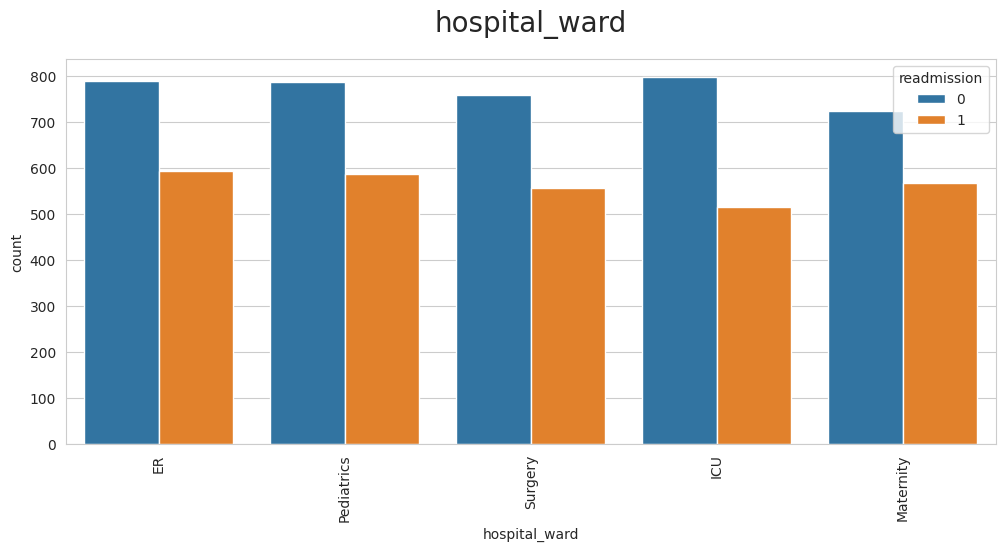

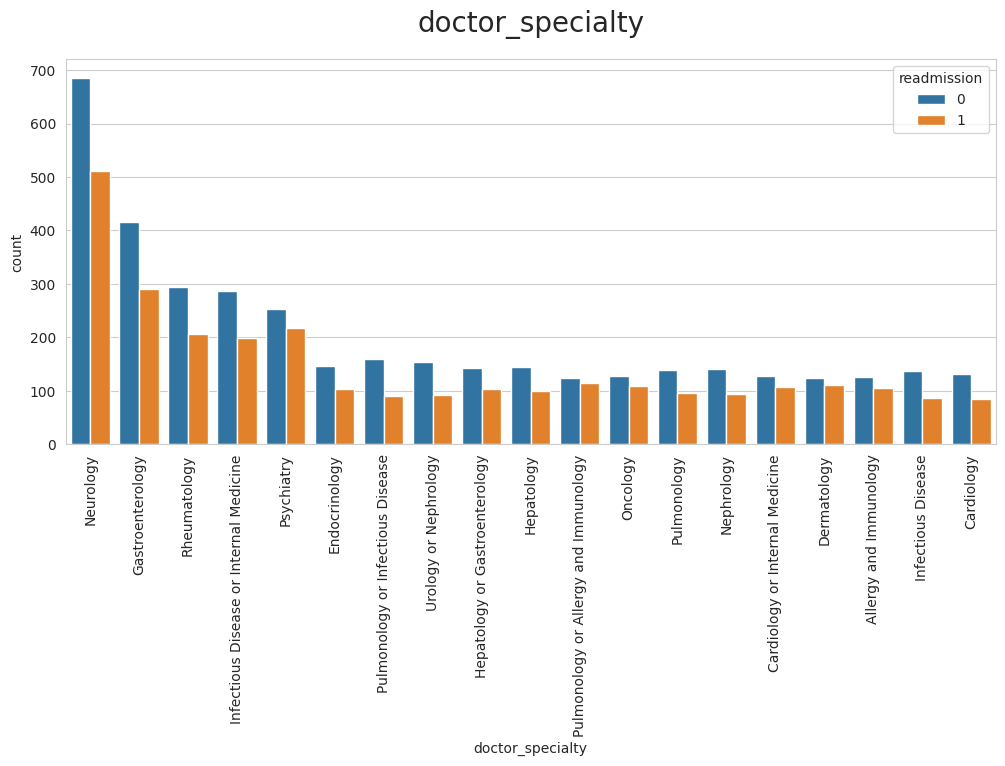

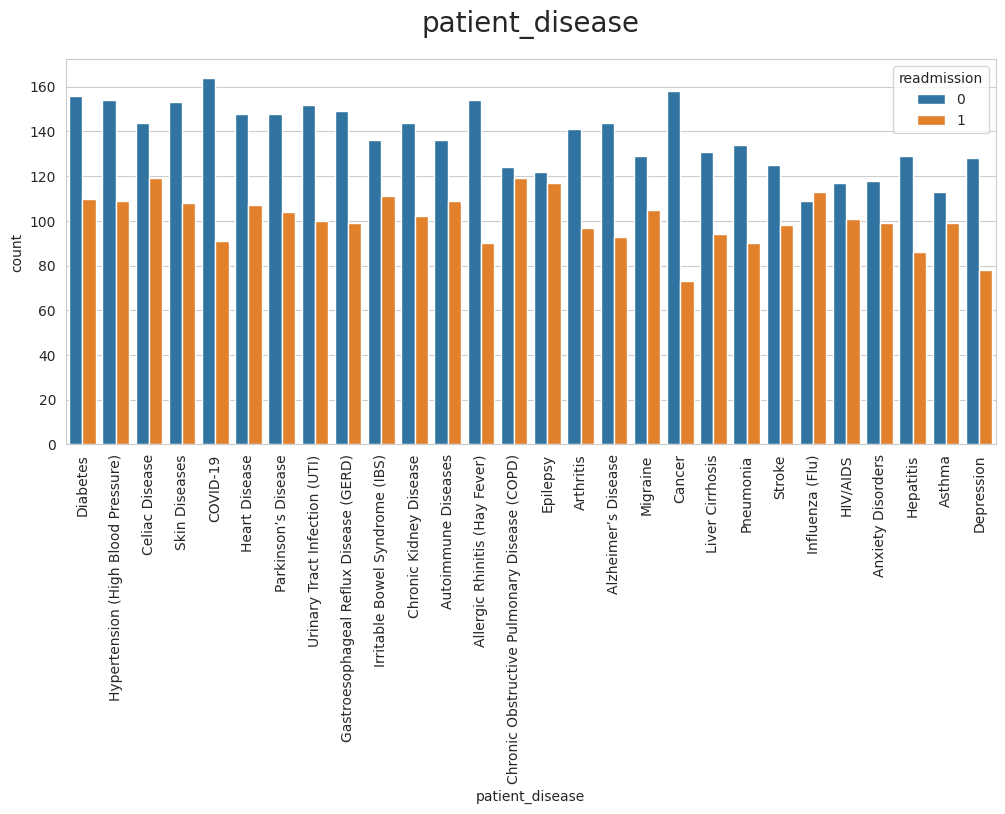

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'readmission'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

### Parallel Plot

In [21]:
import plotly.express as px
fig = px.parallel_categories(df_eda, color="readmission")
fig.show(renderer='jupyterlab')

---

# Conclusions and Next Steps

**These are the conclusions drawn from this notebook's analysis:**

* Patients treated by pulmonologists, or specialists in allergy and immunology, are more likely to be readmitted.

* Patients seen by infectious disease doctors are more likely to be readmitted, including those with influenza (flu) or COVID-19.

* Patients who were admitted to the ICU ward have a higher chance of being readmitted after discharge.

* Cancer patients are likely to return for continued care.

* Patients with chronic obstructive pulmonary disease (COPD) are more likely to be readmitted.

* Patients with epilepsy are more likely to return to the hospital/health facility.


The next notebook "`03 - Data Cleaning`" will cover data cleaning 
